# Lab 4


## Import Python Libraries and Connect to Database


In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [4]:
cur=conn.cursor()

## Question 1

In [5]:
sql_q1 = """
            select * from gp31.student
            """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,studenta1@dukes.jmu.edu,Student A,IA
1,studentb2@dukes.jmu.edu,Student B,IA
2,studentc3@dukes.jmu.edu,Student C,IA
3,studentd4@dukes.jmu.edu,Student D,IA
4,studente5@dukes.jmu.edu,Student E,IA


## Question 2


In [7]:
sql_q2 = """
            select gp31.professor.p_name,
            gp31.course.c_name
            from gp31.professor
            inner join gp31.course
            on gp31.professor.p_email = gp31.course.p_email
            
            """

In [8]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Kathleen Moore,Research Design and Writing for Intelligence
2,Stephen Marrin,Introduction to Intelligence Analysis
3,Timothy Walton,Hypothesis Testing
4,Evan Mungin,Advanced Data Mining
5,Evan Mungin,Data Mining


## Question 3


In [9]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp31.enroll_list
        group by c_number
        order by enrolled desc
        """

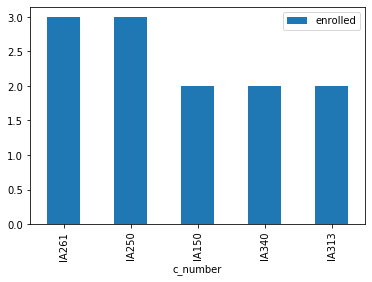

In [10]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## Question 4

In [11]:
sql_q4 = """
            select gp31.professor.p_name,
            count(gp31.course.c_name) as teaching_number
            from gp31.professor
            inner join gp31.course
            on gp31.professor.p_email = gp31.course.p_email
            group by professor.p_name
            order by teaching_number desc
            """

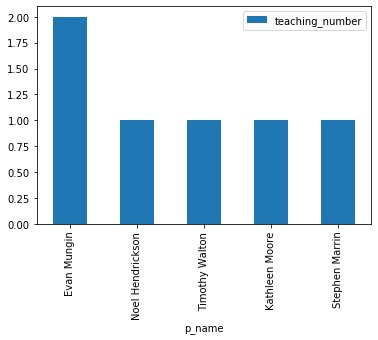

In [14]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Question 5

In [23]:
sql_q5_professor = """
                    insert into gp31.professor(p_email,p_name,office)
                    values ('{}','{}','{}')
                    """.format('evanmunjin@jmu.edu','Evan Munjin','ISAT000')

In [24]:
cur.execute(sql_q5_professor)

In [25]:
conn.commit()

In [26]:
df=pandas.read_sql_query('select * from gp31.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT
1,moore8ka@jmu.edu,Kathleen Moore,ISAT116
2,marrinsp@jmu.edu,Stephen Marrin,Engeo2401
3,waltontr@jmu.edu,Timothy Walton,ISAT326
4,emungin@jmu.edu,Evan Mungin,Engeo 2121
5,new_p@jmu.edu,new_p,new_office
6,new_evanmunjin,Evan Munjin,ISAT000
7,evanmunjin@jmu.edu,Evan Munjin,ISAT000


In [27]:
# Disregard rows 5 and 6, I was playing around with it. 7 is my row I want. 

In [28]:
sql_q5_course = """
                    insert into gp31.course(c_number,c_name,room,p_email)
                    values ('{}','{}','{}','{}')
                    """.format('IA500','Elite Data Mining for Big Brains','Online','evanmunjin@jmu.edu')

In [29]:
cur.execute(sql_q5_course)

In [30]:
conn.commit()

In [31]:
df=pandas.read_sql_query('select * from gp31.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,Online,hendrinx@jmu.edu
1,IA250,Research Design and Writing for Intelligence,Engeo2202,moore8ka@jmu.edu
2,IA150,Introduction to Intelligence Analysis,Engeo2301,marrinsp@jmu.edu
3,IA261,Hypothesis Testing,ISAT150,waltontr@jmu.edu
4,IA341,Advanced Data Mining,Online,emungin@jmu.edu
5,IA340,Data Mining,Online,emungin@jmu.edu
6,IA500,Elite Data Mining for Big Brains,Online,evanmunjin@jmu.edu


In [32]:
sql_q6_course = """
                update gp31.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('evanmunjin@jmu.edu','emungin@jmu.edu')

In [33]:
cur.execute(sql_q6_course)

In [34]:
conn.commit()

In [35]:
df=pandas.read_sql_query('select * from gp31.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,Online,hendrinx@jmu.edu
1,IA250,Research Design and Writing for Intelligence,Engeo2202,moore8ka@jmu.edu
2,IA150,Introduction to Intelligence Analysis,Engeo2301,marrinsp@jmu.edu
3,IA261,Hypothesis Testing,ISAT150,waltontr@jmu.edu
4,IA500,Elite Data Mining for Big Brains,Online,evanmunjin@jmu.edu
5,IA341,Advanced Data Mining,Online,evanmunjin@jmu.edu
6,IA340,Data Mining,Online,evanmunjin@jmu.edu


In [36]:
sql_q6_professor = """
                    delete from gp31.professor
                    where p_email = '{}'
                    """.format('emungin@jmu.edu')

In [37]:
cur.execute(sql_q6_professor)

In [38]:
conn.commit()

In [39]:
df=pandas.read_sql_query('select * from gp31.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT
1,moore8ka@jmu.edu,Kathleen Moore,ISAT116
2,marrinsp@jmu.edu,Stephen Marrin,Engeo2401
3,waltontr@jmu.edu,Timothy Walton,ISAT326
4,new_p@jmu.edu,new_p,new_office
5,new_evanmunjin,Evan Munjin,ISAT000
6,evanmunjin@jmu.edu,Evan Munjin,ISAT000


In [40]:
#Disregard 4 and 5. 

## Close Connection


In [41]:
cur.close()
conn.close()